The difference between the sample mean and the Likelihood maximum is: 0.000


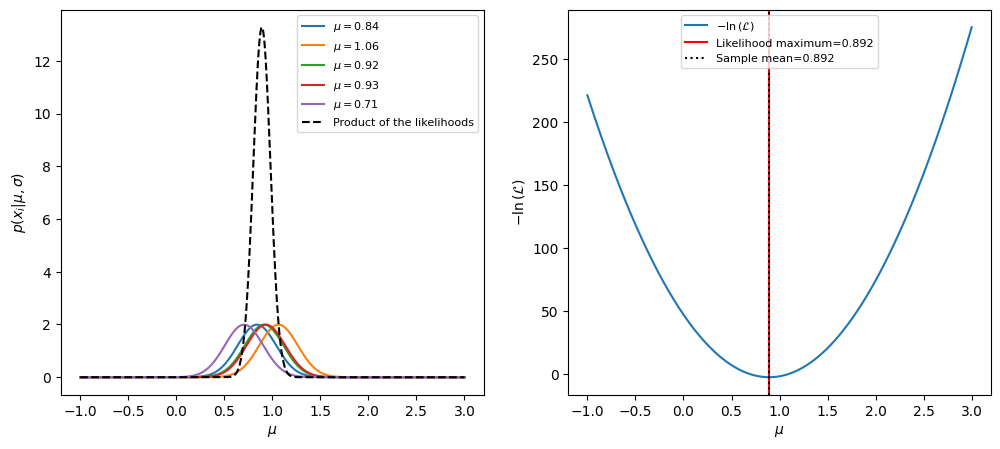

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N=5
mu=1
sigma=0.2
# generating fake measurements
meas=np.random.normal(loc=mu,scale=sigma,size=N)
fig,ax=plt.subplots(1,2,figsize=(12,5))
x=np.linspace(-1,3,100000)
prod=np.ones(len(x))
# plotting each individual distribution
for i in meas:
    ax[0].plot(x,norm.pdf(x,i,sigma),label=r'$\mu=$'+str(round(i,2)))
    prod*=norm.pdf(x,i,sigma)
logL=np.log(prod)
# plotting the product of the likelihoods
ax[0].plot(x,prod,linestyle='--',color='k',label='Product of the likelihoods')
ax[0].legend(loc='upper right',fontsize=8)
ax[0].set(xlabel=r'$\mu$',ylabel=r'$p(x_i|\mu,\sigma)$')

#plotting the log likelihood with max(likelihood) and sample mean to check the results
ax[1].plot(x,-logL,label=r'$-\ln{\left(\mathcal{L}\right)}$')
ax[1].axvline(x[np.argmax(prod)],label=f'Likelihood maximum={x[np.argmax(prod)]:.3f}',color='red',linestyle='-')
ax[1].axvline(np.mean(meas),label=f'Sample mean={np.mean(meas):.3f}',color='black',linestyle=':')
ax[1].legend(loc='upper center',fontsize=8)
ax[1].set(xlabel=r'$\mu$',ylabel=r'$-\ln{\left(\mathcal{L}\right)}$')
print(f'The difference between the sample mean and the Likelihood maximum is: {np.abs(x[np.argmax(prod)]-np.mean(meas)):.3f}')

The difference between the sample standard deviation and the Fisherman matrix error estimator is: 0.00000


[Text(0.5, 0, '$\\mu$'), Text(0, 0.5, '$p(x_i|\\mu,\\sigma)$')]

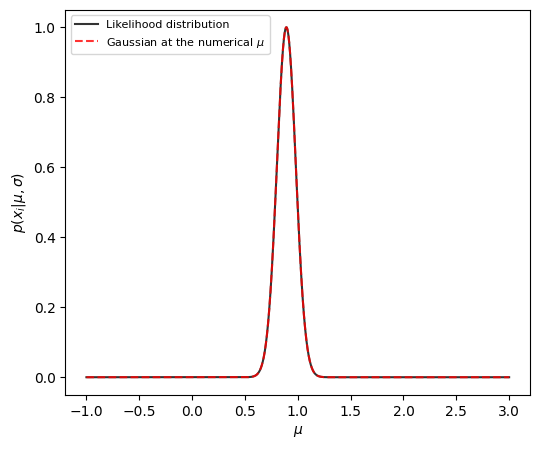

In [2]:
# evaluating the Fisherman matrix error estimator and how it differs from sigma/sqrt(N)

diff2=np.diff(logL,2)
delta=x[1]-x[0]
fish=-diff2/delta**2
sigma_meas=1/np.sqrt(fish[np.argmax(prod)])
sigma_theo=sigma/np.sqrt(N)
print(f'The difference between the sample standard deviation and the Fisherman matrix error estimator is: {np.abs(sigma_meas-sigma_theo):.5f}')

# plotting the gaussian at the measured mu with the error from the Fisherman mtrix to see if it matches the numerical likelihood
# the normalization scale is taken by dividing for the maximum of the 2 distributions

fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.plot(x,prod/max(prod),label='Likelihood distribution',color='black',alpha=0.8)
ax.plot(x,norm.pdf(x,x[np.argmax(prod)],sigma_meas)/max(norm.pdf(x,x[np.argmax(prod)],sigma_meas)),
        label=r'Gaussian at the numerical $\mu$',color='red',linestyle='--',alpha=0.8)
ax.legend(fontsize=8,loc='upper left')
ax.set(xlabel=r'$\mu$',ylabel=r'$p(x_i|\mu,\sigma)$')

/tmp/ipykernel_18483/3611236553.py:14: RuntimeWarning: divide by zero encountered in log
  logL=np.log(prod)


The difference between the sample mean and the Likelihood maximum is: 0.000


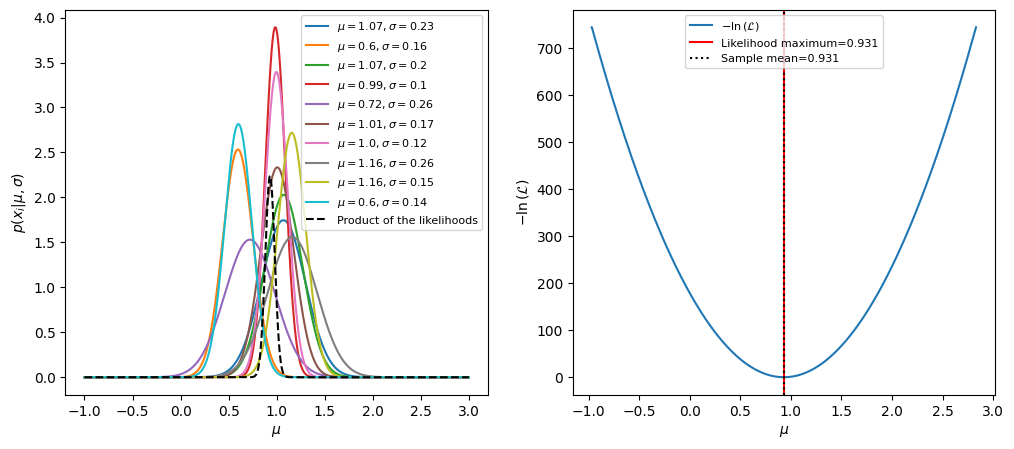

In [3]:
# repeating everything with a different sigma value for each measurement

fig,ax=plt.subplots(1,2,figsize=(12,5))
N=10
mu=1
sigma=0.2
meas=np.random.normal(loc=mu,scale=sigma,size=N)
sigmas=np.random.normal(loc=0.2,scale=0.05,size=N)
weights=1/sigmas**2
prod=np.ones(len(x))
for i,j in zip(meas,sigmas):
    ax[0].plot(x,norm.pdf(x,i,j),label=r'$\mu=$'+str(round(i,2))+r'$, \sigma=$'+str(round(j,2)))
    prod*=norm.pdf(x,i,j)
logL=np.log(prod)
ax[0].plot(x,prod,linestyle='--',color='k',label='Product of the likelihoods')
ax[0].legend(loc='upper right',fontsize=8)
ax[0].set(xlabel=r'$\mu$',ylabel=r'$p(x_i|\mu,\sigma)$')

ax[1].plot(x,-logL,label=r'$-\ln{\left(\mathcal{L}\right)}$')
ax[1].axvline(x[np.argmax(prod)],label=f'Likelihood maximum={x[np.argmax(prod)]:.3f}',color='red',linestyle='-')
ax[1].axvline(np.average(meas,weights=weights),label=f'Sample mean={np.average(meas,weights=weights):.3f}',color='black',linestyle=':')
ax[1].legend(loc='upper center',fontsize=8)
ax[1].set(xlabel=r'$\mu$',ylabel=r'$-\ln{\left(\mathcal{L}\right)}$')
print(f'The difference between the sample mean and the Likelihood maximum is: {np.abs(x[np.argmax(prod)]-np.average(meas,weights=weights)):.3f}')

The difference between the sample standard deviation and the Fisherman matrix error estimator is: 0.00000


/home/giacomo/myenv/lib/python3.12/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


[Text(0.5, 0, '$\\mu$'), Text(0, 0.5, '$p(x_i|\\mu,\\sigma)$')]

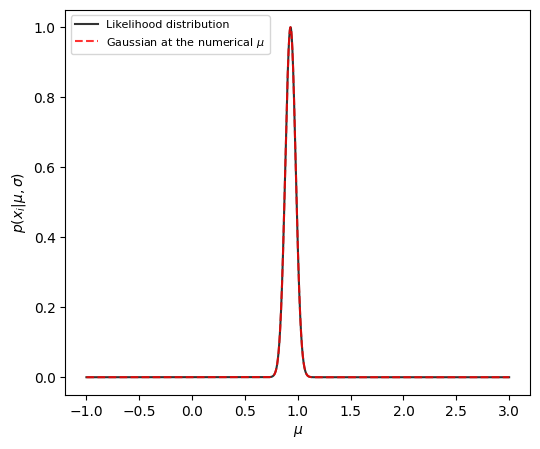

In [4]:
diff2=np.diff(logL,2)
delta=x[1]-x[0]
fish=-diff2/delta**2
sigma_meas=1/np.sqrt(fish[np.argmax(prod)])
sigma_theo=np.sum(weights)**(-1/2)

print(f'The difference between the sample standard deviation and the Fisherman matrix error estimator is: {np.abs(sigma_meas-sigma_theo):.5f}')
fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.plot(x,prod/max(prod),label='Likelihood distribution',color='black',alpha=0.8)
ax.plot(x,norm.pdf(x,x[np.argmax(prod)],sigma_meas)/max(norm.pdf(x,x[np.argmax(prod)],sigma_meas)),
        label=r'Gaussian at the numerical $\mu$',color='red',linestyle='--',alpha=0.8)
ax.legend(fontsize=8,loc='upper left')
ax.set(xlabel=r'$\mu$',ylabel=r'$p(x_i|\mu,\sigma)$')